In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
population = pd.read_csv('OneDrive/Desktop/Machine learning/2014-uganda-population-by-sex-sex-ratio-by-district.csv')
population.drop(columns='Unnamed: 9', inplace=True, axis=1)
original_data = population.copy()
population.head(15)

,Region,District,Sub-county,Male,Female,Total,Sex Ratio*,Land Area (Sq. Km),Population Density**
0,Western,Buhweju,Bihanga,6543,6746,13578,49.2,98.0,136.0
1,Western,Buhweju,Bitsya,7664,8216,15880,48.3,64.6,246.0
2,Western,Buhweju,Burere,9473,9748,19221,49.3,185.8,103.0
3,Western,Buhweju,Engaju,9269,9712,18981,48.8,175.8,108.0
4,Western,Buhweju,Karungu,7366,8072,15438,47.7,50.0,309.0
5,Western,Buhweju,Nsiika Town Council,2956,2956,2956,49.1,15.0,197.0
6,Western,Buhweju,Nyakishana,9024,8966,17990,50.2,82.5,218.0
7,Western,Buhweju,Rwengwe,8270,8695,16965,48.7,79.1,214.0
8,Western,Buhweju,Buhweju Total,59059,61661,120720,48.9,750.8,161.0
9,Western,Buliisa,Biiso,8066,8312,16378,97.0,290.7,56.3


In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                1499 non-null   object 
 1   District              1499 non-null   object 
 2   Sub-county            1499 non-null   object 
 3   Male                  1499 non-null   int64  
 4   Female                1499 non-null   int64  
 5   Total                 1499 non-null   int64  
 6   Sex Ratio*            1499 non-null   float64
 7   Land Area (Sq. Km)    1300 non-null   float64
 8   Population Density**  1300 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 105.5+ KB


In [4]:
print(f"shape of the dataframe: {population.shape}")
print(f"Number of total columns: {population.shape[1]}")
print(f"Number of total rows: {population.shape[0]}")

shape of the dataframe: (1499, 9)
Number of total columns: 9
Number of total rows: 1499


In [5]:
print(f"Null values within the dataset: \n\n{population.isna().sum()}")

Null values within the dataset: 

Region                    0
District                  0
Sub-county                0
Male                      0
Female                    0
Total                     0
Sex Ratio*                0
Land Area (Sq. Km)      199
Population Density**    199
dtype: int64


In [6]:
print(f"Total Unique features with the dataset: \n\n{population.nunique()}")

Total Unique features with the dataset: 

Region                     4
District                 111
Sub-county              1447
Male                    1454
Female                  1456
Total                   1480
Sex Ratio*               316
Land Area (Sq. Km)      1045
Population Density**     741
dtype: int64


In [7]:
print(f"Total Null values per column within the dataset given by percentage: \n\n{population.isna().sum()/len(population)*100}")

Total Null values per column within the dataset given by percentage: 

Region                   0.000000
District                 0.000000
Sub-county               0.000000
Male                     0.000000
Female                   0.000000
Total                    0.000000
Sex Ratio*               0.000000
Land Area (Sq. Km)      13.275517
Population Density**    13.275517
dtype: float64


In [8]:
print(f"tranposed view of the Statistical Description of the dataset:")
population.describe().T

tranposed view of the Statistical Description of the dataset:


,count,mean,std,min,25%,50%,75%,max
Male,1499.0,22480.127418,50323.613515,1137.0,6679.000,10582.0,16979.50,9.490350e+05
Female,1499.0,23594.182789,53941.046203,1037.0,6916.500,11106.0,17826.00,1.048383e+06
Total,1499.0,46072.530354,104234.800132,2174.0,13578.000,21639.0,34808.00,1.997418e+06
Sex Ratio*,1499.0,96.929068,23.913317,47.7,92.700,95.5,99.10,9.565727e+02
Land Area (Sq. Km),1300.0,620.778354,12547.696119,1.6,41.625,98.0,214.85,4.521517e+05
Population Density**,1300.0,489.260077,1019.569169,3.0,132.225,247.5,434.25,1.276100e+04


In [9]:
# remove white spaces within the column names
population.columns = population.columns.str.strip().str.replace(" ", "_")
population.columns

Index(['Region', 'District', 'Sub-county', 'Male', 'Female', 'Total',
       'Sex_Ratio*', 'Land_Area_(Sq._Km)', 'Population_Density**'],
      dtype='object')

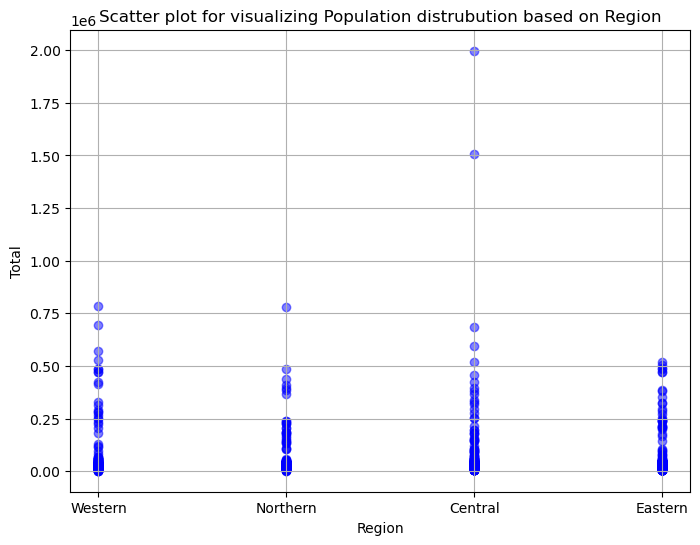

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(population['Region'], population['Total'], color='blue', alpha=0.5)
plt.title("Scatter plot for visualizing Population distrubution based on Region")
plt.xlabel('Region')
plt.ylabel('Total')
plt.grid(True)

In [11]:
## categorical Encoding

cat_features = population.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features: {cat_features}")

Categorical Features: ['Region', 'District', 'Sub-county']


In [12]:
## categorical Encoding

# Initialize LabelEncoder and apply it to each categorical column
label_encoders = {}

for column in cat_features:
    label_encoders[column] = LabelEncoder()
    population[column] = label_encoders[column].fit_transform(population[column])

population.head()

,Region,District,Sub-county,Male,Female,Total,Sex_Ratio*,Land_Area_(Sq._Km),Population_Density**
0,3,13,125,6543,6746,13578,49.2,98.0,136.0
1,3,13,136,7664,8216,15880,48.3,64.6,246.0
2,3,13,282,9473,9748,19221,49.3,185.8,103.0
3,3,13,407,9269,9712,18981,48.8,175.8,108.0
4,3,13,605,7366,8072,15438,47.7,50.0,309.0


In [13]:
print(f"Total Population of Uganda in 2014: {population['Total'].sum()}")

Total Population of Uganda in 2014: 69062723


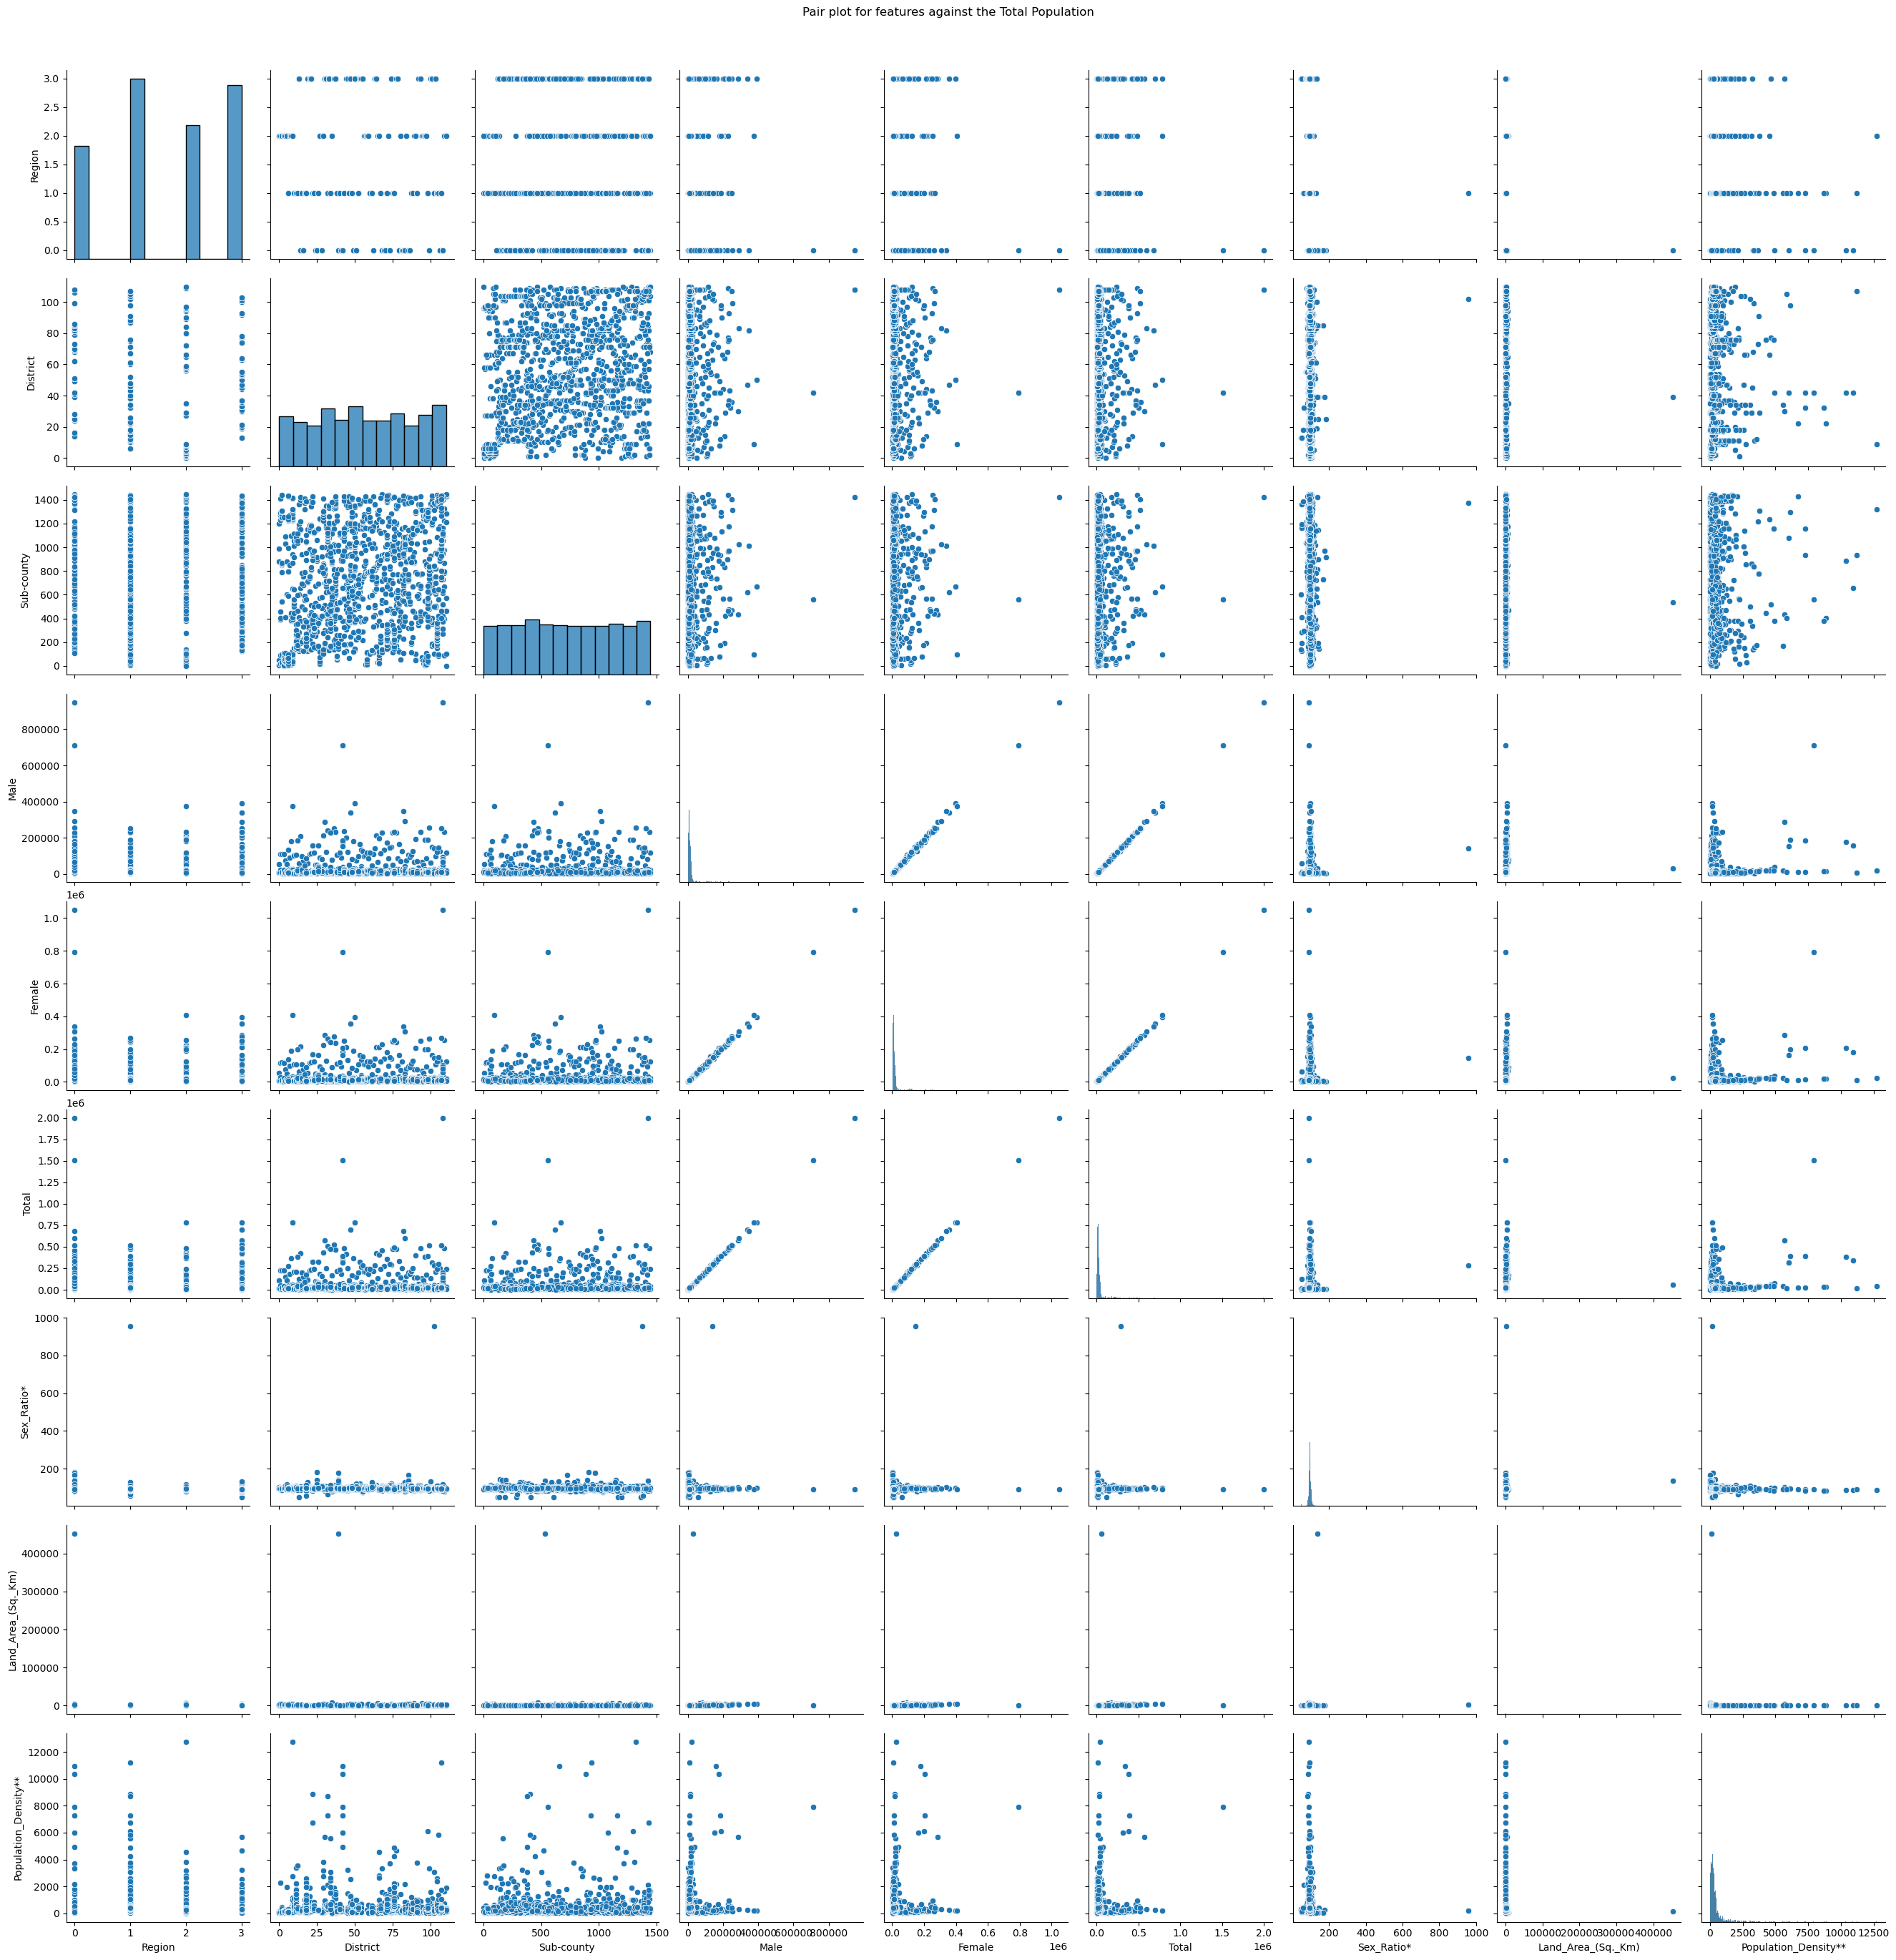

In [14]:
sns.pairplot(data=population, height=3)
plt.suptitle('Pair plot for features against the Total Population', y=1.02)
plt.show()

## Normalization and Scaling of the Data

**Scaling:** Adjusts the range of the data. Common scaling techniques include:

`StandardScaler:` Standardizes features by removing the mean and scaling to unit variance.

`MinMaxScaler:` Scales features to a given range, usually between 0 and 1.

**Normalization:** Adjusts the distribution of the data to a normal distribution. Techniques include:

`Normalizer:` Scales individual samples to have unit norm.

`RobustScaler:` Scales features using statistics that are robust to outliers.

In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# Handling the missing values using knn imputer
# handle missing values by replacing them with the mean (or median) of the k-nearest neighbors.

knnimputer = KNNImputer(n_neighbors=10)
pop_imputed = pd.DataFrame(knnimputer.fit_transform(population), columns=population.columns)

In [16]:
# scaling and Normalization
scaler = MinMaxScaler()
pop_scaled = scaler.fit_transform(pop_imputed)

norm = RobustScaler()
pop_norm = pd.DataFrame(norm.fit_transform(pop_scaled), columns=pop_imputed.columns)

In [17]:
pop_norm.head()

,Region,District,Sub-county,Male,Female,Total,Sex_Ratio*,Land_Area_(Sq._Km),Population_Density**
0,0.5,-0.773585,-0.824100,-0.392117,-0.399652,-0.379699,-7.234375,-0.068986,-0.459415
1,0.5,-0.773585,-0.808864,-0.283287,-0.264907,-0.271267,-7.375000,-0.269346,-0.073647
2,0.5,-0.773585,-0.606648,-0.107665,-0.124479,-0.113895,-7.218750,0.457708,-0.575146
3,0.5,-0.773585,-0.433518,-0.127470,-0.127779,-0.125200,-7.296875,0.397720,-0.557611
4,0.5,-0.773585,-0.159280,-0.312218,-0.278106,-0.292087,-7.468750,-0.356929,0.147293


<Axes: >

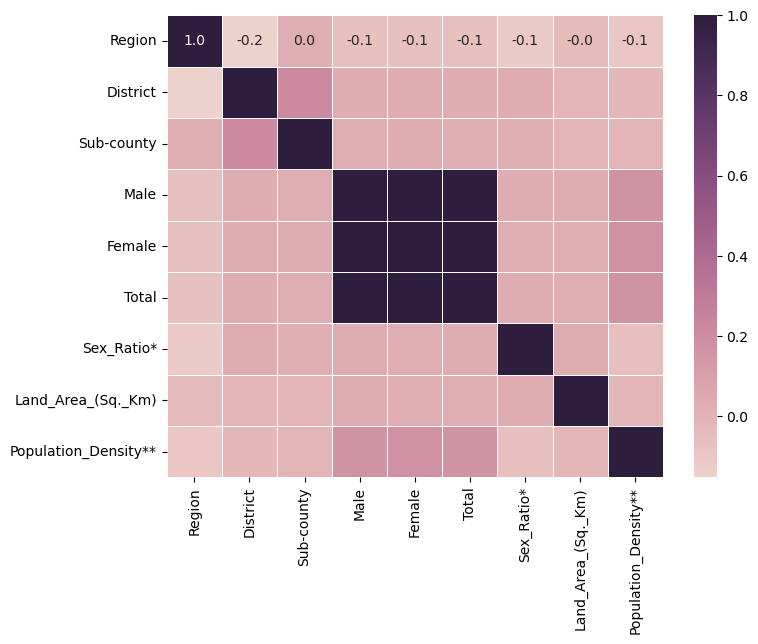

In [18]:
# correlation between the features

plt.figure(figsize=(8,6))
sns.heatmap(pop_norm.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, fmt='.1f')

In [19]:
# dropping highly correlating features

pop_norm.drop(['Male', 'Female'], inplace=True, axis=1)

<Axes: >

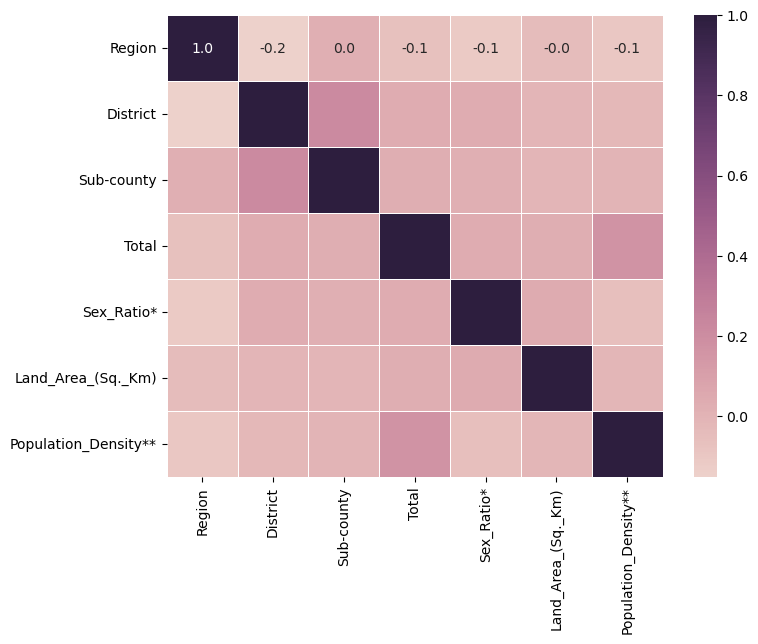

In [20]:
# correlation between the features

plt.figure(figsize=(8,6))
sns.heatmap(pop_norm.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, fmt='.1f')

In [21]:
corr = pop_norm.corr()
corr['Total'].abs().sort_values(ascending=False)

Total                   1.000000
Population_Density**    0.172450
Region                  0.069042
Sex_Ratio*              0.035599
District                0.033328
Sub-county              0.032069
Land_Area_(Sq._Km)      0.031323
Name: Total, dtype: float64

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

"""
Variance Inflation Factor (VIF) measures the correlation among the features in a dataset.
High VIF values indicate high multicollinearity, which can be problematic in regression analysis.
"""

pop_norm_vif = pop_norm.drop('Total', axis=1)
pop_norm_vif = pop_norm_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame() # instantiates an empty dataframe to store the vif data
vif_data['Feature'] = pop_norm_vif.columns
vif_data['VIF'] = [variance_inflation_factor(pop_norm_vif.values, i) for i in range(len(pop_norm_vif.columns))]
print(vif_data)

                Feature       VIF
0                Region  1.082682
1              District  1.084516
2            Sub-county  1.053858
3            Sex_Ratio*  1.022568
4    Land_Area_(Sq._Km)  1.004751
5  Population_Density**  1.035034


In [23]:
import statsmodels.api as sm

cols_to_convert = ['Region', 'District', 'Sub-county', 'Sex_Ratio*', 'Land_Area_(Sq._Km)', 'Population_Density**']
pop_norm[cols_to_convert] = pop_norm[cols_to_convert].apply(pd.to_numeric, errors='coerce')
pop_norm['Total'] = pop_norm['Total'].apply(pd.to_numeric, errors='coerce')

X =  sm.add_constant(pop_norm.drop('Total', axis=1))
y = pop_norm['Total']

# This module allows estimation by ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

OLS model coefficients:
 const                   0.858678
Region                 -0.391262
District                0.189266
Sub-county              0.236454
Sex_Ratio*              0.050494
Land_Area_(Sq._Km)      0.002179
Population_Density**    0.251064
dtype: float64 



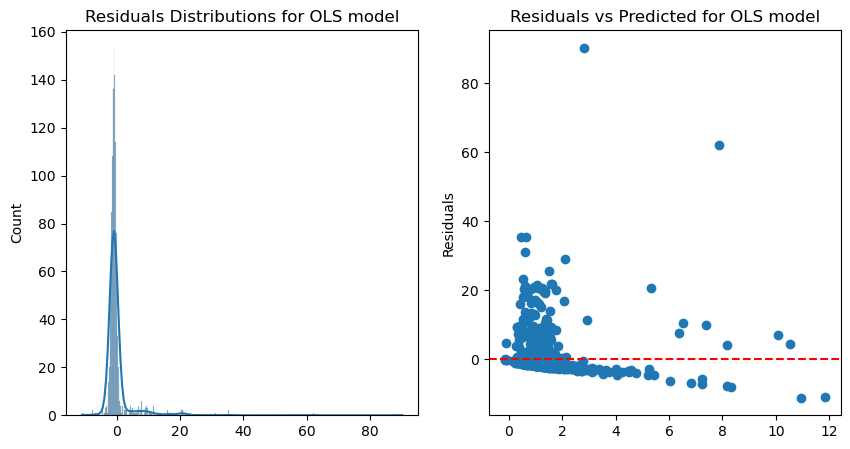

In [24]:
residuals = model.resid # residuals represent the differences between the observed values and the values predicted by the model

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title(f'Residuals Distributions for OLS model')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residuals vs Predicted for OLS model')
plt.ylabel('Residuals')

print(f"OLS model coefficients:\n", model.params, '\n')

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)

print(f"r2 Score for OLS model:", round(r2_score(y, predictions), 2))
print(f"Mean Squared Error for OLS model: ", round(mean_squared_error(y, predictions), 2))

r2 Score for OLS model: 0.04
Mean Squared Error for OLS model:  23.21


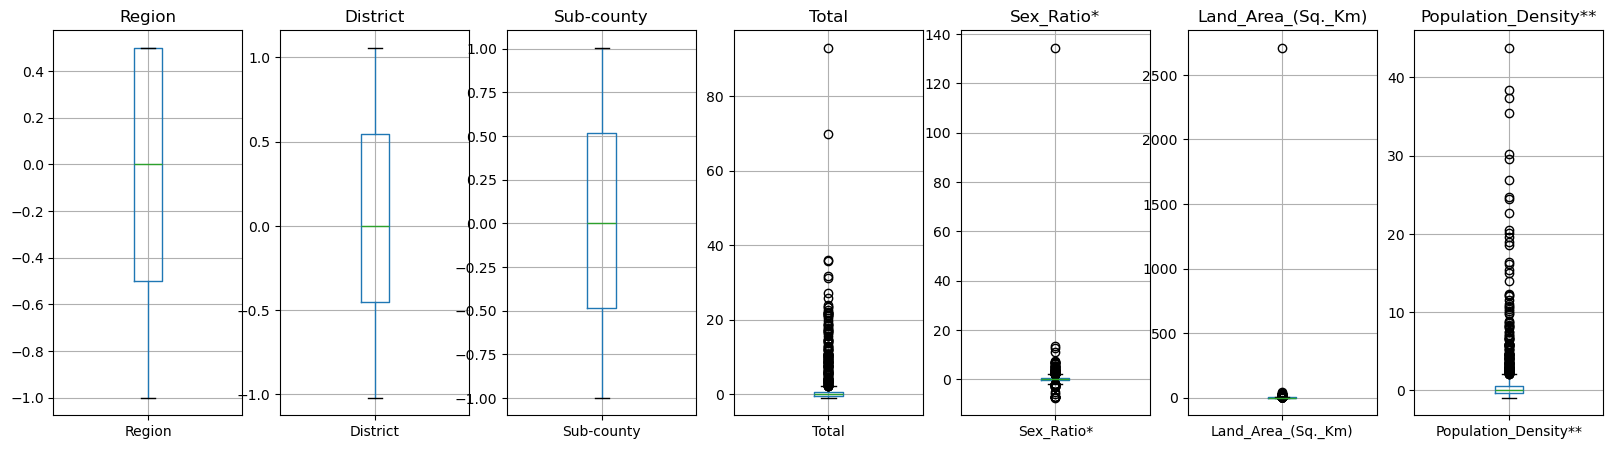

In [27]:
# Visualizing the outliers

def plot_boxplot(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5))

    for i, col_name in enumerate(df.columns):
        df.boxplot(column=col_name, ax=axes[i])
        axes[i].set_title(col_name)

plot_boxplot(pop_norm)

In [28]:
# Removing Outliers

def remove_outliers(df):
    df_no_outliers = df.copy()

    for col_name in df.columns:
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)

        IQR = Q3 - Q1 # interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers[col_name] = df_no_outliers[col_name].apply(lambda x: lower_bound if x < lower_bound
                                                                 else upper_bound if x > upper_bound else x)
    return df_no_outliers

In [29]:
pop_new = remove_outliers(pop_norm)

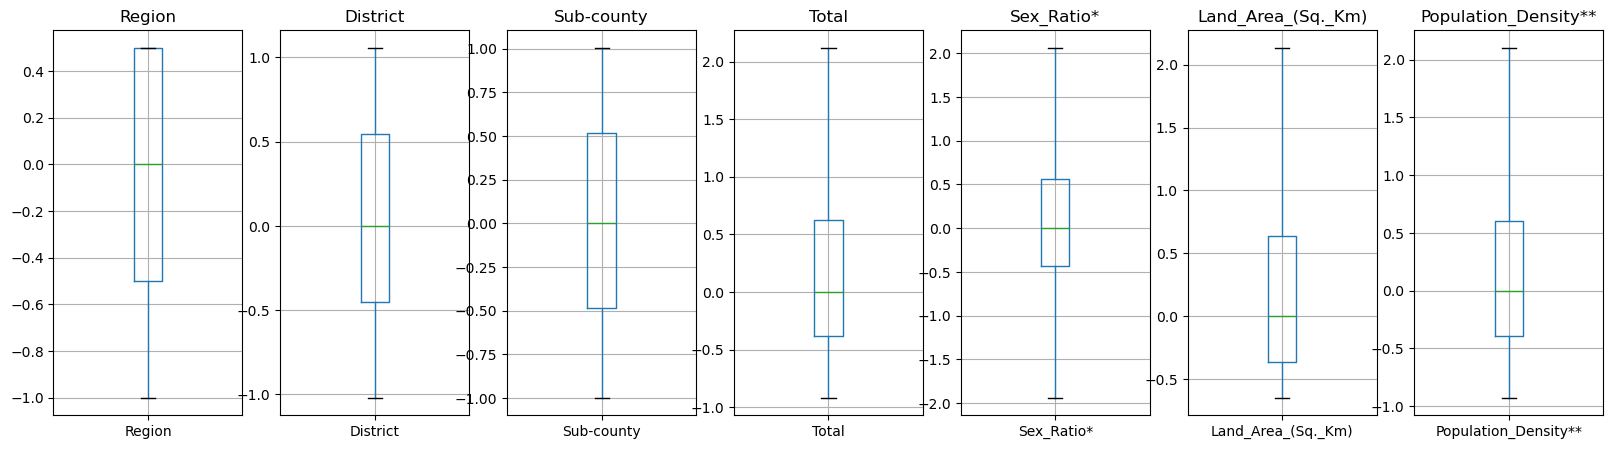

In [30]:
# Visualizing the outliers with the new dataframe without outliers

def plot_boxplot(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5))

    for i, col_name in enumerate(df.columns):
        df.boxplot(column=col_name, ax=axes[i])
        axes[i].set_title(col_name)

plot_boxplot(pop_new)

In [31]:
# converting the new df to stat models

cols_to_convert = ['Region', 'District', 'Sub-county', 'Sex_Ratio*', 'Land_Area_(Sq._Km)', 'Population_Density**']
pop_new[cols_to_convert] = pop_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
pop_new['Total'] = pop_new['Total'].apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(pop_new.drop('Total', axis=1))
y = pop_new['Total']

# This module allows estimation by ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

In [32]:
# Model evaluation and Assessment on the new df

predictions = model.predict(X)

print(f"r2 Score for OLS model:", round(r2_score(y, predictions), 2))
print(f"Mean Squared Error for OLS model: ", round(mean_squared_error(y, predictions), 2))

r2 Score for OLS model: 0.51
Mean Squared Error for OLS model:  0.33


Model Coefficients:
 const                  -0.086479
Region                 -0.127975
District                0.035690
Sub-county             -0.067147
Sex_Ratio*             -0.144661
Land_Area_(Sq._Km)      0.759453
Population_Density**    0.355826
dtype: float64


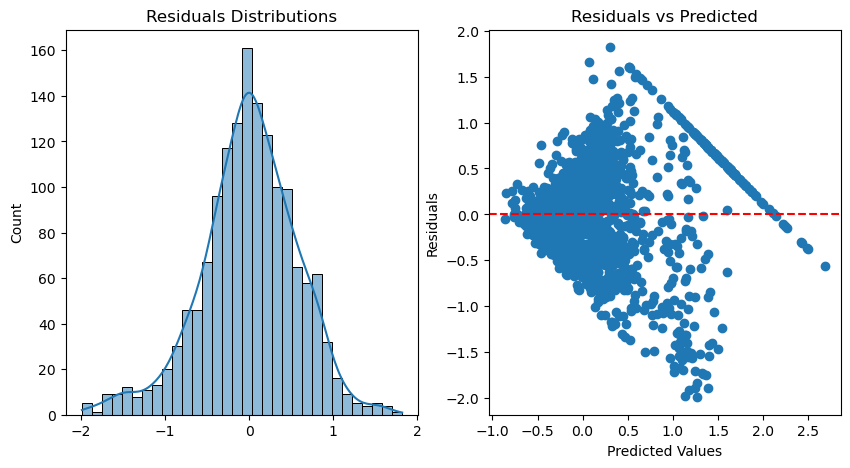

In [33]:
residuals = model.resid

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distributions')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')

print("Model Coefficients:\n", model.params)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) # Training data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.2) # validation data

In [35]:
## Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

preds_train = lr.predict(X_valid)
preds_test = lr.predict(X_test)

print(f"train r2 Score: ", r2_score(y_valid, preds_train))
print(f"train Mean Squared Error:", mean_squared_error(y_valid, preds_train), '\n\n')
print(f"test r2 Score: ", r2_score(y_test, preds_test))
print(f"test Mean Squared Error:", mean_squared_error(y_test, preds_test))

train r2 Score:  0.6302465418965695
train Mean Squared Error: 0.26855796406351384 


test r2 Score:  0.42717412566770463
test Mean Squared Error: 0.3474759185900877


In [ ]:
results = {'Actual': y_test, 'Predictions': preds_test}
results_df = pd.DataFrame(data=results)